# Titanic

* Data from Kaggle : 'train.csv'
    https://www.kaggle.com/c/titanic/data
        

Import Python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import the Data

In [2]:
train_df = pd.read_csv('train.csv')  # Dataset to Train and Validate on

# Some Data Exploration

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many males / females survived ?

In [6]:
# Numbers of people
pd.crosstab(train_df['Survived'], train_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [7]:
# As fractions
pd.crosstab(train_df['Survived'], train_df['Sex'], normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


<Figure size 432x288 with 0 Axes>

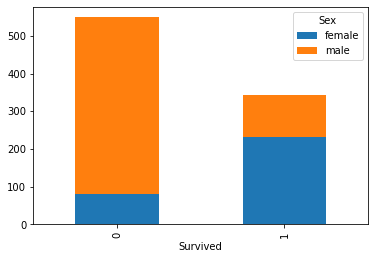

In [8]:
plt.figure()
pd.crosstab(train_df['Survived'], train_df['Sex'] ).plot(kind='bar', stacked=True, grid=False)
plt.show()

# Can you explore more relationships in the data?

* Are Class, Fare, Port etc.. important to understand who survived?
* Choose an appropriate plot type for each one e.g. bar, scatter histogram etc..

### Port of Embarkation

<Figure size 432x288 with 0 Axes>

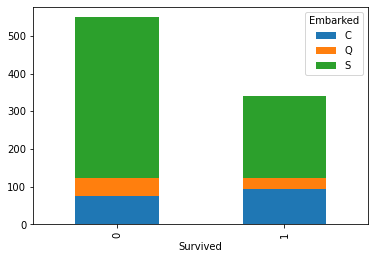

Embarked,C,Q,S
Survived,,,
0,0.084364,0.052868,0.480315
1,0.104612,0.033746,0.244094


In [9]:
plt.figure()
pd.crosstab(train_df['Survived'], train_df['Embarked']).plot(kind='bar', stacked=True, grid=False)
plt.show()

pd.crosstab(train_df['Survived'], train_df['Embarked'], normalize=True)

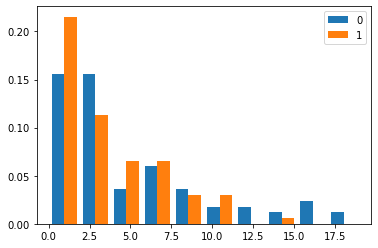

In [23]:
# Try a Matplotlib Histogram by Age

plt.figure()
by_age = pd.crosstab(train_df['Age'],train_df['Survived'])
plt.hist(by_age, label=by_age.columns, density=True)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Survived'>

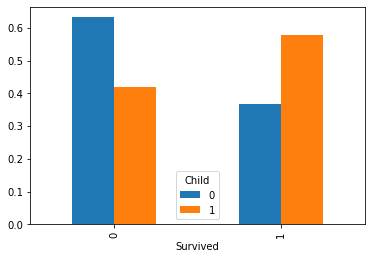

In [22]:
# See if a "Child" is more likely to have survived

train_df['Child'] = np.where(train_df['Age']<=12, 1, 0)
pd.crosstab(train_df['Survived'],train_df['Child'], normalize='columns').plot(kind='bar')

## Put your comments on the Data Analysis in Here
* Males were much more likely to not-survive
*- 81% of males did not survive
*- 26 % of females did not survive


* Most passengers embarked in Southampton (S), but they were twice as likely to perish as survive. A slight majority of passengers embarking in Cobh (C) survived (55%).


* Children were more likely to survive compared to Adults 